In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
from scipy import stats

In [3]:
PICKLE_DUMPS_PATH = os.path.join('..', 'resources', 'pickle_dumps')

In [4]:
def get_pickle_dump_path(dump_name):
    return os.path.join(PICKLE_DUMPS_PATH, f'{dump_name}.pkl')

In [5]:
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (10, 10)

In [6]:
def load_from_pickle(pickle_path):
    with open(pickle_path, 'rb') as pickle_file:
        return pickle.load(pickle_file)

In [7]:
def bootstrap_samples(arr, n_samples=500, with_replacement=True):
    return np.array([np.random.choice(arr, len(arr), replace=with_replacement) for _ in range(n_samples)])

In [30]:
def test_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    print(f'Mean residual: {np.mean(residuals)}')
    statistics, p = stats.shapiro(residuals)
    print(f'Shapiro-Wilk normality test p-value: {p}, statistics: {statistics}')
    
    residual_samples = bootstrap_samples(residuals, with_replacement=False).T
    np.var(residual_samples, axis=1)
    
    plt.hist(residuals, bins=50)
    plt.axvline(np.percentile(residuals, 95), 0, 100, color='r', label='95th percentile')
    plt.axvline(np.percentile(residuals, 5), 0, 100, color='g', label='5th percentile')
    plt.axvline(np.percentile(residuals, 50), 0, 100, color='orange', label='50th percentile')
    plt.legend()
    plt.xlabel('Residual')
    plt.title('Residual histogram')
    plt.show()
    
    plt.clf()
    plt.scatter(y_true, residuals, marker='o')
    plt.xlabel('True value')
    plt.ylabel('Residual')
    plt.show()

## diabetes sklearn GBR

In [9]:
reg, X_train, X_val, X_test, y_train, y_val, y_test = load_from_pickle(
    get_pickle_dump_path('diabetes_sklearn_gbr'))

/home/itukh/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator DummyRegressor from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/itukh/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/itukh/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator GradientBoostingRegressor from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Mean residual: 2.455856445928113e-14
Shapiro-Wilk normality test p-value: 0.04278020188212395


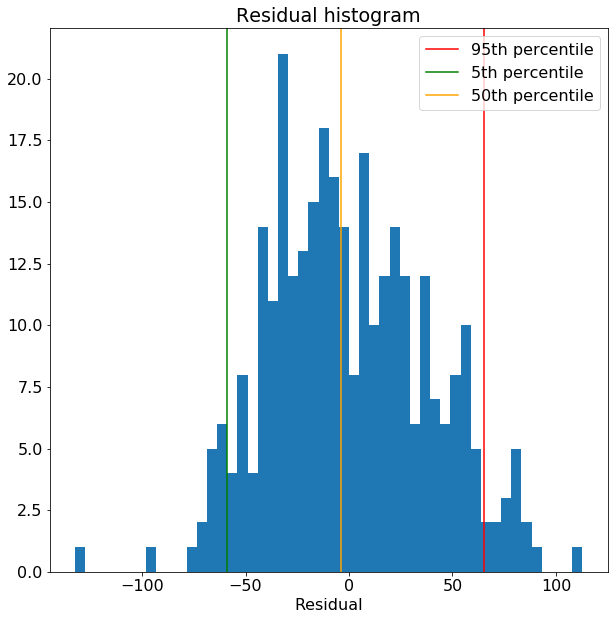

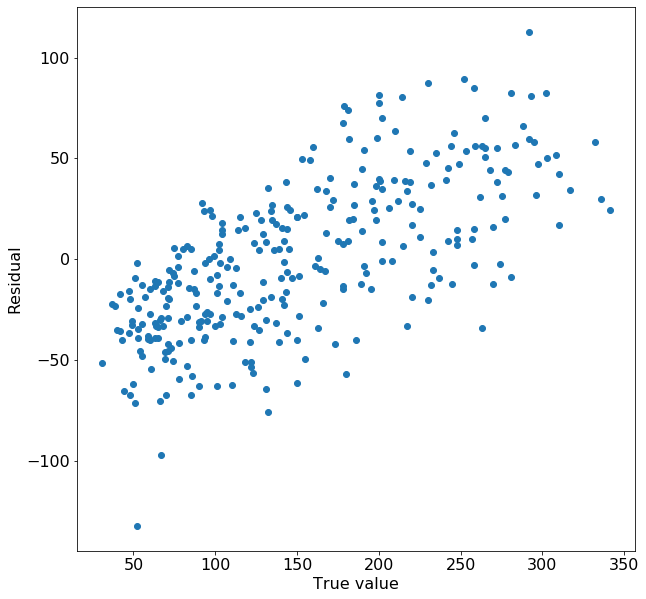

In [10]:
test_residuals(y_train, reg.predict(X_train))

## diabetes catboost GBRm

In [28]:
catboost_reg = load_from_pickle(get_pickle_dump_path('diabetes_catboost_cbr'))[0]

Mean residual: 0.09229952537307941
Shapiro-Wilk normality test p-value: 0.0032482489477843046


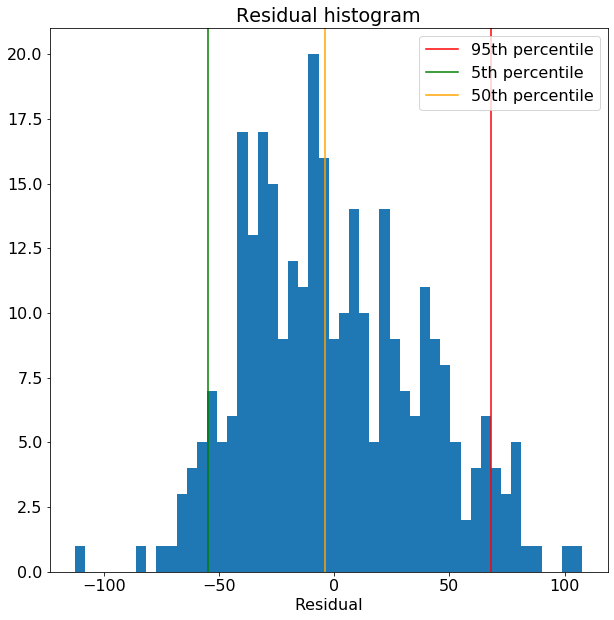

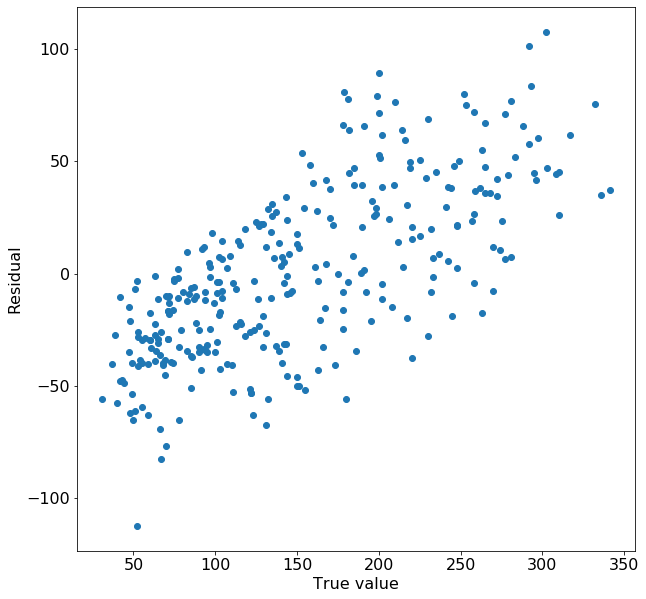

In [29]:
test_residuals(y_train, catboost_reg.predict(X_train))

## california housing catboost

In [17]:
ch_reg, ch_X_train, ch_X_val, ch_X_test, ch_y_train, ch_y_val, ch_y_test = load_from_pickle(get_pickle_dump_path('california_housing_catboost_cbr'))

Mean residual: 1.469410906992015e-05
Shapiro-Wilk normality test p-value: 0.0, statistics: 0.9651365876197815


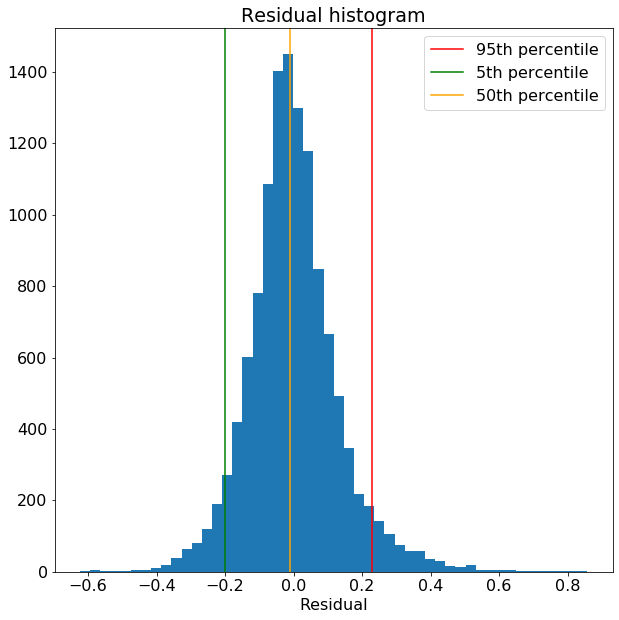

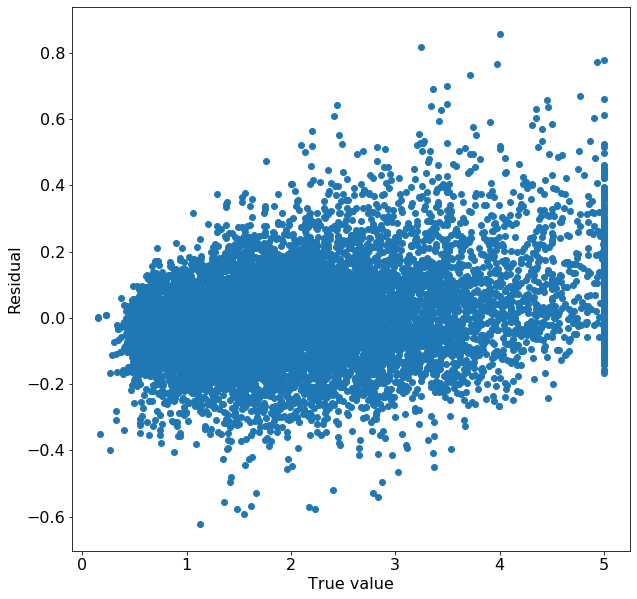

In [31]:
test_residuals(ch_y_train, ch_reg.predict(ch_X_train))